In [18]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mimg

In [19]:
import imutils

In [66]:
def crop_img(img):
    '''
    Recortar imagen utilizando tecnicas de preprocesamiento
    '''

    resized = cv2.resize(img,())
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray,(3,3),0)
    thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV ,15,6) #Probar con 6 y con 7

    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)

    x, y, w, h = cv2.boundingRect(c)
    cropped = img[y:y+h,x:x+w]

    return cropped
    
'''Probaré con los dos números para ver qué recortes se realizaron de forma incorrecta y veré la proporción de este nuevo dataset con el original. 
   Si no se han perdido muchos entonces emplearé ese.
   También usaré el de 6 para comparar la precisión entre ambos
'''

Text(0.5, 1.0, 'Glioma 4')

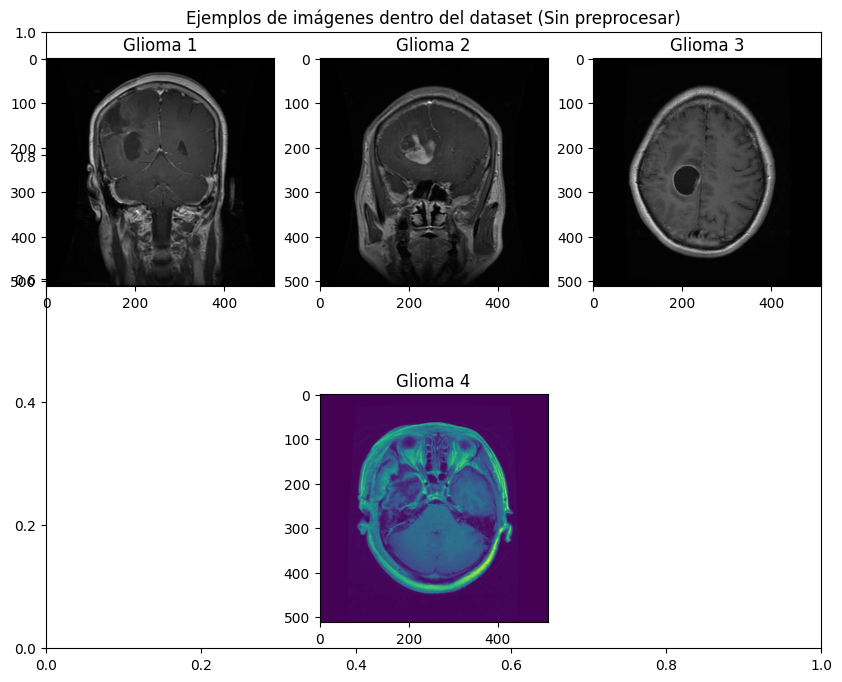

In [67]:
#Comprobacion por parte
sample_img1 = mimg.imread("masoudnickparvar/brain-tumor-mri-dataset/versions/1/Training/glioma/Tr-gl_0010.jpg")
sample_img2 = mimg.imread("masoudnickparvar/brain-tumor-mri-dataset/versions/1/Training/glioma/Tr-gl_0030.jpg")
sample_img3 = mimg.imread("masoudnickparvar/brain-tumor-mri-dataset/versions/1/Training/glioma/Tr-gl_0054.jpg")
sample_img4 = mimg.imread("masoudnickparvar/brain-tumor-mri-dataset/versions/1/Training/glioma/Tr-gl_0162.jpg")

plt.figure(figsize = (10,8)) ; plt.title("Ejemplos de imágenes dentro del dataset (Sin preprocesar)")
plt.subplot(231); plt.imshow(sample_img1) ; plt.title("Glioma 1")
plt.subplot(232); plt.imshow(sample_img2) ; plt.title("Glioma 2")
plt.subplot(233); plt.imshow(sample_img3) ; plt.title("Glioma 3")
plt.subplot(235); plt.imshow(sample_img4) ; plt.title("Glioma 4")

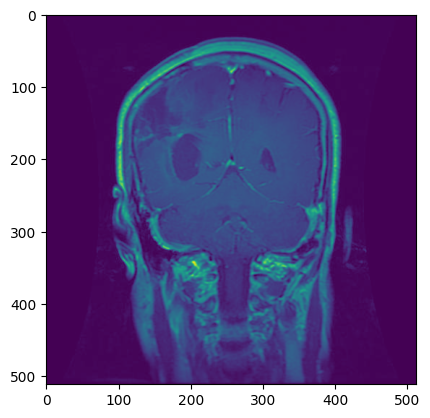

In [68]:
from pathlib import Path

img1 = cv2.imread(Path("masoudnickparvar/brain-tumor-mri-dataset/versions/1/Training/glioma/Tr-gl_0010.jpg"),cv2.IMREAD_GRAYSCALE)
img_1 = cv2.imread(Path("masoudnickparvar/brain-tumor-mri-dataset/versions/1/Training/glioma/Tr-gl_0010.jpg"))
plt.imshow(img1)

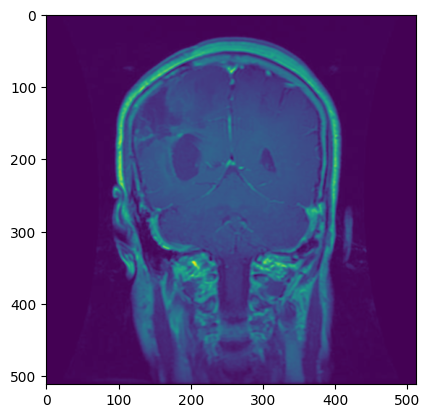

In [69]:
blur = cv2.GaussianBlur(img1,(3,3),0)
plt.imshow(blur)

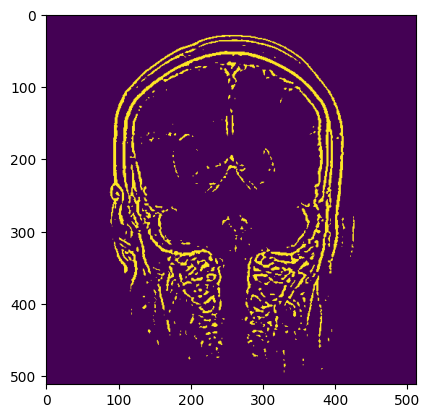

In [70]:
#thresh = cv2.threshold(blur, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV ,15,9)
plt.imshow(thresh)


In [71]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)



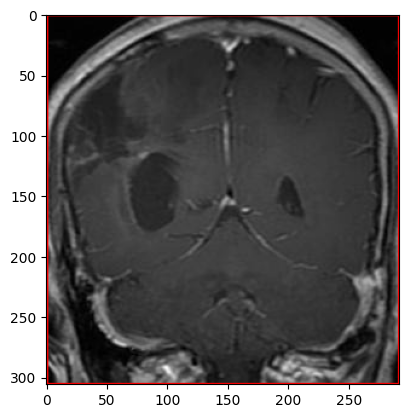

In [72]:
mask = np.zeros_like(img1)
cv2.drawContours(mask, [c], -1, (0,255,0), -1)
masked = cv2.bitwise_and(img1, img1, mask=mask)
x, y, w, h = cv2.boundingRect(c)
cv2.rectangle(img_1, (x,y),(x+w, y+h),(255,0,0),2)
cropped = img_1[y:y+h,x:x+w]
plt.imshow(cropped)

Text(0.5, 1.0, 'Glioma 4')

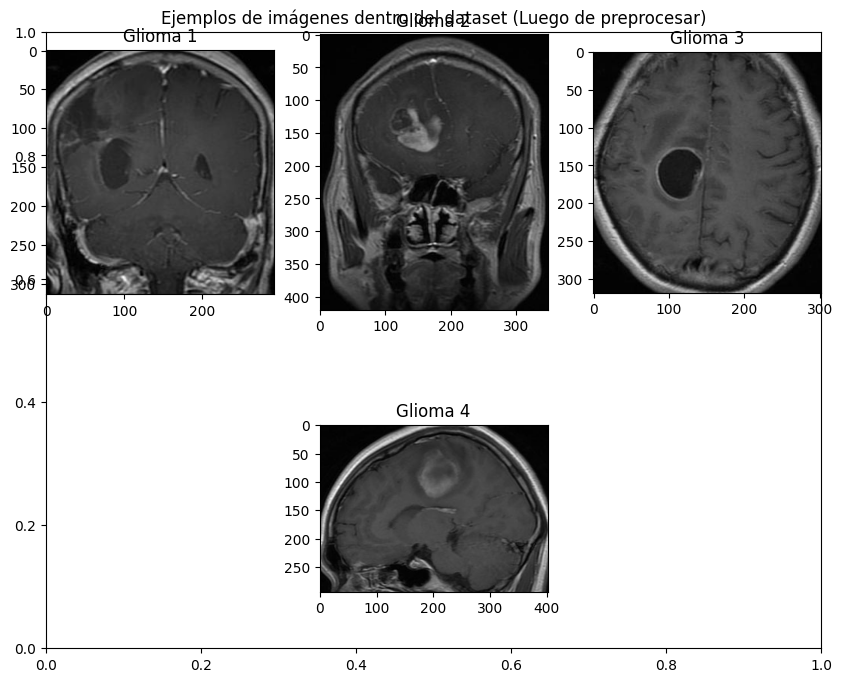

In [76]:
sample_img1 = crop_img(cv2.imread(Path("masoudnickparvar/brain-tumor-mri-dataset/versions/1/Training/glioma/Tr-gl_0010.jpg")))
sample_img2 = crop_img(cv2.imread(Path("masoudnickparvar/brain-tumor-mri-dataset/versions/1/Training/glioma/Tr-gl_0030.jpg")))
sample_img3 = crop_img(cv2.imread(Path("masoudnickparvar/brain-tumor-mri-dataset/versions/1/Training/glioma/Tr-gl_0054.jpg")))
sample_img4 = crop_img(cv2.imread(Path("masoudnickparvar/brain-tumor-mri-dataset/versions/1/Training/glioma/Tr-gl_0038.jpg")))


plt.figure(figsize = (10,8)) ; plt.title("Ejemplos de imágenes dentro del dataset (Luego de preprocesar)")
plt.subplot(231); plt.imshow(sample_img1) ; plt.title("Glioma 1")
plt.subplot(232); plt.imshow(sample_img2) ; plt.title("Glioma 2")
plt.subplot(233); plt.imshow(sample_img3) ; plt.title("Glioma 3")
plt.subplot(235); plt.imshow(sample_img4) ; plt.title("Glioma 4")